Version 2

---

- Investment Strategy: Buy-on-Dip: buying into the market only when there is a drop in price.<br>
- Methodology: I plan to simulate a buy-on-dip strategy that includes purchasing 1 share of two popular ETFs for every 1%, 2%, 3%, 4%, 5% drop in price.<br>
- Follow-up Question:  After getting started with this strategy, is there ever a time when my invested dollars are greater than the value of my investments?  In other words:  are there periods of time where I am siting on a loss?

In [1]:
#Loading libraries

import yfinance as yf 
import pandas as pd
import openpyxl
import datetime as dt
import matplotlib.pyplot as plt

# AI description of the libraries
# `yfinance`: This is a popular open-source library that allows you to access the financial data available on Yahoo Finance. You can download historical market data, get real-time data, and more.
# `pandas`: This is a powerful data manipulation library in Python. It provides data structures and functions needed to manipulate structured data, including functions for reading and writing data in a variety of formats.
# `openpyxl`: This is a Python library for reading and writing Excel 2010 xlsx/xlsm/xltx/xltm files. It is used when you want to work with Excel files (.xlsx, .xlsm) in Python.
# `datetime`: This is a module in Python's standard library for working with dates and times. It provides classes for manipulating dates and times in both simple and complex ways.

I am using two low cost ETFs for this analysis.<br>
- SPLG is a low cost ETF that tracks the S&P 500 index.
- XLG is a low cost, ETF that tracks the 50 largest companies in the S&P 500 index.

Methodology:<br>
1. Download 10 years of SPLG data.<br>
2. Implement the methodology.<br>
3. Check the results.<br>

In [2]:
# Download 10 years of SPLG stock data
ticker = yf.Ticker("SPLG")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'SPLG')
df.to_csv('yf_splg.csv', index=False)

# Implement buy-on-dip strategy.
# Create a list to store purchased shares
purchased_list = []

# Define the buy-on-dip levels
dip_levels = [0.99, 0.98, 0.97, 0.96, 0.95]

# Analyze each row for buy-on-dip opportunities
for index, row in df.iterrows():
    open_price = row['Open']
    low_price = row['Low']
    for level in dip_levels:
        target_price = open_price * level
        if low_price <= target_price:
            # Create a new record to be added
            new_record = {
                'Date': row['Date_add'],
                'Symbol': row['Symbol'],
                'Buy_Price': target_price,
                'Buy_Level': f"{(1 - level) * 100}%"
            }
            purchased_list.append(new_record)

# Create DataFrame from the list of dictionaries
purchased = pd.DataFrame(purchased_list)

# Save the purchased DataFrame to a CSV file
purchased.to_csv('yf_splg_purchased.csv', index=False)


In [3]:
# Download 10 years of XLG stock data
ticker = yf.Ticker("XLG")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'XLG')
df.to_csv('yf_xlg.csv', index=False)

# Implement buy-on-dip strategy.
# Create a list to store purchased shares
purchased_list = []

# Define the buy-on-dip levels
dip_levels = [0.99, 0.98, 0.97, 0.96, 0.95]

# Analyze each row for buy-on-dip opportunities
for index, row in df.iterrows():
    open_price = row['Open']
    low_price = row['Low']
    for level in dip_levels:
        target_price = open_price * level
        if low_price <= target_price:
            # Create a new record to be added
            new_record = {
                'Date': row['Date_add'],
                'Symbol': row['Symbol'],
                'Buy_Price': target_price,
                'Buy_Level': f"{(1 - level) * 100}%"
            }
            purchased_list.append(new_record)

# Create DataFrame from the list of dictionaries
purchased = pd.DataFrame(purchased_list)

# Save the purchased DataFrame to a CSV file
purchased.to_csv('yf_xlg_purchased.csv', index=False)


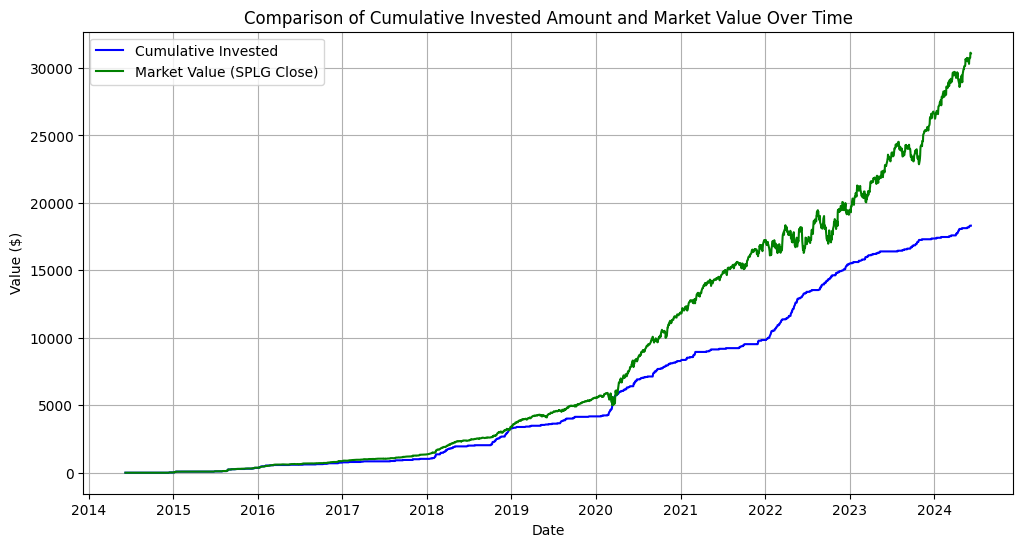

In [4]:
# Load historical data
df = pd.read_csv('yf_splg.csv', parse_dates=['Date_add'])

# Load purchase history
purchased = pd.read_csv('yf_splg_purchased.csv', parse_dates=['Date'])

# Rename columns for clarity
df.rename(columns={'Date_add': 'Date'}, inplace=True)

# Initialize variables to track the cumulative amount invested and shares owned
cumulative_invested = 0
shares_owned = 0

# Initialize lists to track the cumulative invested amount and the market value
cumulative_invested_list = []
market_value_list = []
dates = []

# Track investment values
for index, row in df.iterrows():
    date = row['Date']
    close_price = row['Close']
    
    # Check if any shares were purchased on this date
    daily_purchases = purchased[purchased['Date'] == date]
    for _, purchase in daily_purchases.iterrows():
        shares_owned += 1
        cumulative_invested += purchase['Buy_Price']
    
    # Calculate the market value of the shares owned on this date
    market_value = shares_owned * close_price
    
    # Append values to the lists
    cumulative_invested_list.append(cumulative_invested)
    market_value_list.append(market_value)
    dates.append(date)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Date': dates,
    'Cumulative Invested': cumulative_invested_list,
    'Market Value': market_value_list
})

# Plot the cumulative invested amount and the market value
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Date'], comparison_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
plt.plot(comparison_df['Date'], comparison_df['Market Value'], label='Market Value (SPLG Close)', color='green')
plt.title('Comparison of Cumulative Invested Amount and Market Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.grid(True)
plt.show()


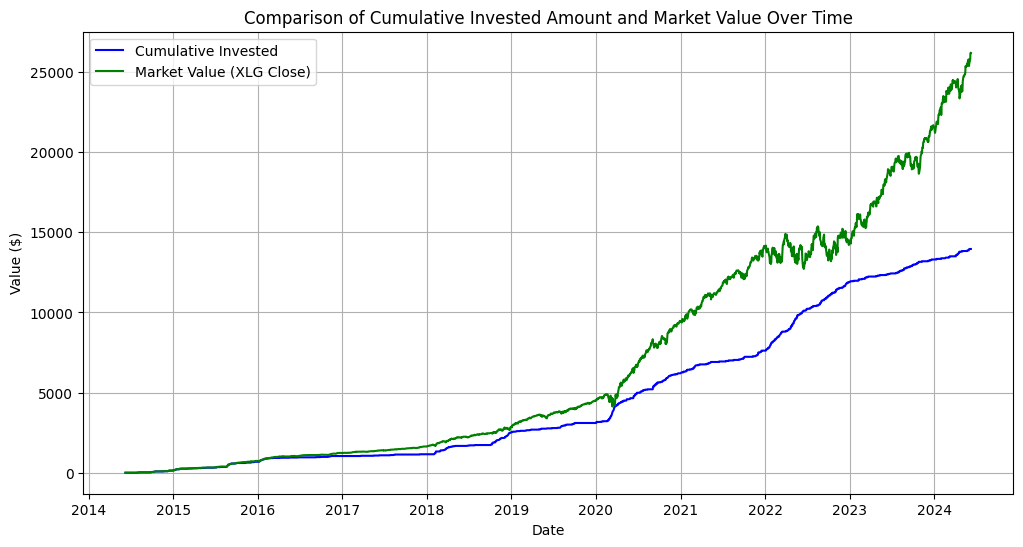

In [5]:
# Load historical data
df = pd.read_csv('yf_xlg.csv', parse_dates=['Date_add'])

# Load purchase history
purchased = pd.read_csv('yf_xlg_purchased.csv', parse_dates=['Date'])

# Rename columns for clarity
df.rename(columns={'Date_add': 'Date'}, inplace=True)

# Initialize variables to track the cumulative amount invested and shares owned
cumulative_invested = 0
shares_owned = 0

# Initialize lists to track the cumulative invested amount and the market value
cumulative_invested_list = []
market_value_list = []
dates = []

# Track investment values
for index, row in df.iterrows():
    date = row['Date']
    close_price = row['Close']
    
    # Check if any shares were purchased on this date
    daily_purchases = purchased[purchased['Date'] == date]
    for _, purchase in daily_purchases.iterrows():
        shares_owned += 1
        cumulative_invested += purchase['Buy_Price']
    
    # Calculate the market value of the shares owned on this date
    market_value = shares_owned * close_price
    
    # Append values to the lists
    cumulative_invested_list.append(cumulative_invested)
    market_value_list.append(market_value)
    dates.append(date)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Date': dates,
    'Cumulative Invested': cumulative_invested_list,
    'Market Value': market_value_list
})

# Plot the cumulative invested amount and the market value
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Date'], comparison_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
plt.plot(comparison_df['Date'], comparison_df['Market Value'], label='Market Value (XLG Close)', color='green')
plt.title('Comparison of Cumulative Invested Amount and Market Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.legend()
plt.grid(True)
plt.show()
